In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import random

In [108]:
filepath2 = "wdbc_preped_scaled.csv"
df_scaled = pd.read_csv(filepath2, index_col = 0)

K- Nearest Neighbors

In [109]:
# Set seed for the built-in 'random' module
random.seed(1)

# Set seed for NumPy
np.random.seed(1)

Y = df_scaled['Diagnosis']
X = df_scaled[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [113]:
##############################KNN#########################################
#Find best k for each ct
 
cts = [0.4,0.5,0.6, 0.7,0.9]
result_df = pd.DataFrame(columns=['Best_k','Best_Accuracy','Best_Sensitivity', 'Best_Specificity'], index=cts)
max_k= round(np.sqrt(df_scaled.shape[0]))
    
for ct in cts:
    print(f'##########CT: {ct}#############')
    best_k = 0
    best_accuracy = 0
    best_ct = 0
    best_spec = 0
    best_sen = 0
    error_min = 10000
    for k in range(1, max_k, 2):  # iterate through different values of k
        # print(f'for k value {k}')
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,Y_train)
        ypred_knn_prob = knn.predict_proba(X_test)
        
        ypred_knn = []
        for i in range(0, len(ypred_knn_prob)):
            if ypred_knn_prob[i][1] > ct:
                result = 1
            else:
                result = 0
            ypred_knn.append(result)
            
        accuracy = accuracy_score(Y_test, ypred_knn)
        conf_matrix = confusion_matrix(Y_test, ypred_knn)
        
        TN = conf_matrix[0, 0]
        FP = conf_matrix[0, 1]
        FN = conf_matrix[1, 0]
        TP = conf_matrix[1, 1]

        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        error = (FP + FN) / (TP + TN + FP + FN)

        if error < error_min:
            error_min = error
            
            best_accuracy = accuracy
            best_k = k
            # best_ct= ct
            best_spec = specificity
            best_sen = sensitivity
        print(f'error_min is {error_min} for {k}')
        
        # print(f'accuracy: {accuracy}')
        # print(f'confusion matrix: {conf_matrix}')
        #print(f'sensitivity: {sensitivity}')
        #print(f'specificity: {specificity}')
        # print(f'misclassification error: {error}')
        #print("")
    print(f'best_k: {best_k}')
    print("#####################")    
    result_df.loc[ct, 'Best_k'] = best_k
    result_df.loc[ct, 'least_error'] = error_min
    result_df.loc[ct, 'Best_Sensitivity'] = best_sen
    result_df.loc[ct, 'Best_Specificity'] = best_spec 
    result_df.loc[ct, 'Best_Accuracy'] = best_accuracy

print("KNN RESULTS:")
result_df
    
    #print(f'Best_k: {best_k}')
    #print(f'Best_accuracy: {best_accuracy}')
    #print(f'Best_specificity: {best_spec}')
    #print(f'Best_sensitivity: {best_sen}')
    #print("")


##########CT: 0.4#############
error_min is 0.08391608391608392 for 1
error_min is 0.06293706293706294 for 3
error_min is 0.06293706293706294 for 5
error_min is 0.06293706293706294 for 7
error_min is 0.06293706293706294 for 9
error_min is 0.06293706293706294 for 11
error_min is 0.055944055944055944 for 13
error_min is 0.055944055944055944 for 15
error_min is 0.055944055944055944 for 17
error_min is 0.055944055944055944 for 19
error_min is 0.055944055944055944 for 21
error_min is 0.04195804195804196 for 23
best_k: 23
#####################
##########CT: 0.5#############
error_min is 0.08391608391608392 for 1
error_min is 0.06293706293706294 for 3
error_min is 0.06293706293706294 for 5
error_min is 0.055944055944055944 for 7
error_min is 0.04195804195804196 for 9
error_min is 0.04195804195804196 for 11
error_min is 0.04195804195804196 for 13
error_min is 0.04195804195804196 for 15
error_min is 0.04195804195804196 for 17
error_min is 0.04195804195804196 for 19
error_min is 0.04195804195804

,Best_k,Best_Accuracy,Best_Sensitivity,Best_Specificity,least_error
0.4,23,0.958042,0.909091,0.988636,0.041958
0.5,9,0.958042,0.890909,1.0,0.041958
0.6,9,0.951049,0.872727,1.0,0.048951
0.7,7,0.944056,0.854545,1.0,0.055944
0.9,1,0.916084,0.909091,0.920455,0.083916


In [105]:
df = pd.DataFrame(ypred_knn_prob)

In [101]:
np.sum((df.iloc[:,1] < 0.4) & (df.iloc[:,1] > 0.3))

12

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

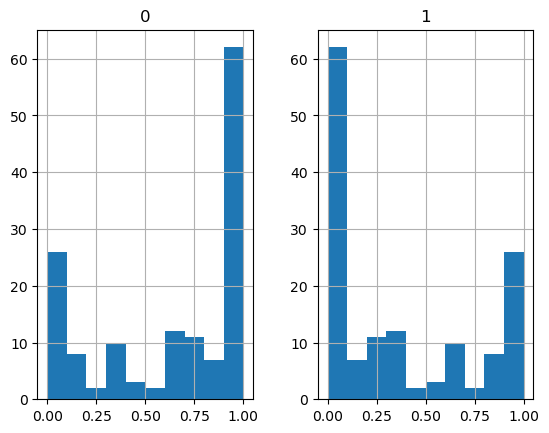

In [102]:
df.hist()

In [8]:
df.shape

(114, 2)